In [1]:
# libraries for analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluation libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Supervised learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
  
# adding entry into the specifications
# of the warnings filter.
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'imblearn'

In [2]:
# to order code lines
import black

## Data Preprocessing

In [41]:
# Importing dataset
dataset = pd.read_csv("airbnb_listings_information.csv", on_bad_lines='skip')
dataset.head(1)

,Unnamed: 0,neighborhood_overview,host_name,host_location,host_about,host_response_time,host_verifications,neighbourhood,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
0,0,Not even 10 minutes by metro from Victoria Sta...,Adriano,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,"['email', 'phone', 'reviews', 'jumio', 'offlin...","London, United Kingdom",Entire apartment,Entire home apt,"Refrigerator, Kitchen, Crib, Dedicated workspa...",0,4,1,3,105.0,2,192,91.0,1


In [42]:
# removing the first index column
dataset =  dataset.iloc[: , 1:]

In [43]:
dataset.head(2)

,neighborhood_overview,host_name,host_location,host_about,host_response_time,host_verifications,neighbourhood,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
0,Not even 10 minutes by metro from Victoria Sta...,Adriano,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,"['email', 'phone', 'reviews', 'jumio', 'offlin...","London, United Kingdom",Entire apartment,Entire home apt,"Refrigerator, Kitchen, Crib, Dedicated workspa...",0,4,1,3,105.0,2,192,91.0,1
1,Finsbury Park is a friendly melting pot commun...,Alina,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,"['email', 'phone', 'facebook', 'reviews', 'off...","Islington, Greater London, United Kingdom",Private room in apartment,Private room,"Long term stays allowed, Lock on bedroom door,...",0,2,1,1,40.0,1,21,97.0,0


In [44]:
# inspecting datatype and comparing to data dictionary
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76254 entries, 0 to 76253
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   neighborhood_overview  47088 non-null  object 
 1   host_name              76254 non-null  object 
 2   host_location          76076 non-null  object 
 3   host_about             42630 non-null  object 
 4   host_response_time     36868 non-null  object 
 5   host_verifications     76254 non-null  object 
 6   neighbourhood          47089 non-null  object 
 7   property_type          76254 non-null  object 
 8   room_type              76254 non-null  object 
 9   amenities              76254 non-null  object 
 10  host_is_superhost      76254 non-null  int64  
 11  accommodates           76254 non-null  int64  
 12  bedrooms               76254 non-null  int64  
 13  beds                   76254 non-null  int64  
 14  price                  76254 non-null  float64
 15  mi

In [45]:
# Accessing the null values in dataset
dataset.isnull().sum()

neighborhood_overview    29166
host_name                    0
host_location              178
host_about               33624
host_response_time       39386
host_verifications           0
neighbourhood            29165
property_type                0
room_type                    0
amenities                    0
host_is_superhost            0
accommodates                 0
bedrooms                     0
beds                         0
price                        0
minimum_nights               0
number_of_reviews            0
review_scores_rating     23688
instant_bookable             0
dtype: int64

Superhosts have a 4.8 or higher average overall rating based on reviews from their Airbnb guests in the past year. Guests know they can expect outstanding hospitality from these Hosts ["AirBnB UK"](https://www.airbnb.co.uk/d/superhost#:~:text=Superhosts%20have%20a%204.8%20or,outstanding%20hospitality%20from%20these%20Hosts.)

Superhost ratings is an important part of the features, it suggests it will elevate the pricing based on "perception" but it will be reviewed further from data to determine if it has strong correlation. Outlook from data also shows that superhost presence does not impact on the overall average review_score_ratings. 
Both will be used as attributes

In [46]:
# Dropping features that will have no impact on outcome at sight view
new_data = dataset.drop(['neighborhood_overview', 'host_name', 'host_about', 'host_response_time', 
                         'host_verifications', 'number_of_reviews'], axis= 1)

In [47]:
new_data

,host_location,neighbourhood,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,price,minimum_nights,review_scores_rating,instant_bookable
0,"London, England, United Kingdom","London, United Kingdom",Entire apartment,Entire home apt,"Refrigerator, Kitchen, Crib, Dedicated workspa...",0,4,1,3,105.0,2,91.0,1
1,"London, England, United Kingdom","Islington, Greater London, United Kingdom",Private room in apartment,Private room,"Long term stays allowed, Lock on bedroom door,...",0,2,1,1,40.0,1,97.0,0
2,"Kensington, England, United Kingdom","London, United Kingdom",Entire apartment,Entire home apt,"Refrigerator, Wifi, Heating, Dishes and silver...",0,2,1,1,75.0,10,96.0,1
3,"London, England, United Kingdom","London, Fitzrovia, United Kingdom",Entire apartment,Entire home apt,"Long term stays allowed, Elevator, Heating, Mi...",1,6,3,3,307.0,4,94.0,0
4,"London, England, United Kingdom","London, United Kingdom",Private room in townhouse,Private room,"TV, Hair dryer, Lock on bedroom door, Carbon m...",0,2,1,1,150.0,3,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76249,"London, England, United Kingdom",NaN,Entire condominium,Entire home apt,"TV, Hair dryer, Washer, Smoke alarm, Shampoo, ...",0,4,2,2,189.0,3,NaN,1
76250,"London, England, United Kingdom",NaN,Entire condominium,Entire home apt,"Essentials, Dryer, Smoke alarm, Shampoo, Dedic...",0,2,1,1,149.0,3,100.0,1
76251,GB,"Greater London, England, United Kingdom",Entire apartment,Entire home apt,"Long term stays allowed, Heating, Extra pillow...",0,4,2,4,273.0,4,NaN,0
76252,GB,"Greater London, England, United Kingdom",Entire apartment,Entire home apt,"Long term stays allowed, Heating, Extra pillow...",0,4,2,2,433.0,3,NaN,0


### Handling Missing Data

In [48]:
new_data.isna().sum()

host_location             178
neighbourhood           29165
property_type               0
room_type                   0
amenities                   0
host_is_superhost           0
accommodates                0
bedrooms                    0
beds                        0
price                       0
minimum_nights              0
review_scores_rating    23688
instant_bookable            0
dtype: int64

In [49]:
# mean was used here to replace missing values because we are looking for the competitive price of airbnb
# in the market where ratings play a role in peception
new_data['review_scores_rating'].mean()

93.05267663508732

In [50]:
new_data['review_scores_rating'].fillna(93, inplace=True)

In [51]:
# inspecting changes
new_data.isna().sum()

host_location             178
neighbourhood           29165
property_type               0
room_type                   0
amenities                   0
host_is_superhost           0
accommodates                0
bedrooms                    0
beds                        0
price                       0
minimum_nights              0
review_scores_rating        0
instant_bookable            0
dtype: int64

In [52]:
new_data[new_data['host_location'].isnull()]

,host_location,neighbourhood,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,price,minimum_nights,review_scores_rating,instant_bookable
10389,NaN,"London, United Kingdom",Entire apartment,Entire home apt,"Shampoo, Hangers, Wifi, Essentials, Elevator, ...",0,6,2,2,220.0,7,93.0,0
10801,NaN,NaN,Entire apartment,Entire home apt,"Wifi, Elevator, Smoke alarm, TV, Iron, Free pa...",0,4,2,2,150.0,1,93.0,0
11318,NaN,NaN,Private room in house,Private room,"Heating, Kitchen, Lock on bedroom door, Wifi, ...",0,1,1,1,17.0,1,40.0,0
11620,NaN,"London, United Kingdom",Entire apartment,Entire home apt,"TV, Heating, Dryer, Washer, Cable TV, Wifi, Es...",0,4,2,2,200.0,1,93.0,0
11951,NaN,"London, United Kingdom",Private room in house,Private room,"Shampoo, Hangers, Wifi, Essentials, Smoke alar...",0,3,2,2,68.0,2,93.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,NaN,"Greater London, England, United Kingdom",Entire house,Entire home apt,"First aid kit, TV, Hair dryer, Washer, Smoke a...",0,4,2,2,100.0,10,93.0,0
74430,NaN,NaN,Entire house,Entire home apt,"First aid kit, Hair dryer, Oven, Washer, Smoke...",0,10,5,6,1200.0,3,93.0,0
75602,NaN,NaN,Private room in apartment,Private room,"First aid kit, TV, Lock on bedroom door, Eleva...",0,1,1,1,25.0,7,93.0,1
75730,NaN,"Greater London, England, United Kingdom",Entire apartment,Entire home apt,"Long term stays allowed, Pour-over coffee, Roo...",0,6,2,2,185.0,2,100.0,1


In [53]:
# replacing nan with '?' which will be later replaced with the corresponding values in @neighbourhood; 
# a relative feature in dataset
new_data['host_location'].fillna('?', inplace=True)

new_data['neighbourhood'].fillna('?', inplace=True)

In [54]:
for i, j in zip(new_data['host_location'], new_data['neighbourhood']):
    if i == "?" and j != "?":
        print(i,j)

? London, United Kingdom
? London, United Kingdom
? London, United Kingdom
? London, United Kingdom
? Greenwich, London, United Kingdom
? Edgware, England, United Kingdom
? Enfield, England, United Kingdom
? London, England, United Kingdom
? London , England, United Kingdom
? Kingston upon Thames, England, United Kingdom
? London, England, United Kingdom
? London, England, United Kingdom
? Greater London, England, United Kingdom
? London, England, United Kingdom
? London, England, United Kingdom
? Greater London, England, United Kingdom
? Greater London, England, United Kingdom
? Greater London, England, United Kingdom
? Greater London, England, United Kingdom
? ロンドン, イングランド, United Kingdom
? Greater London, England, United Kingdom
? Greater London, England, United Kingdom
? Greater London, England, United Kingdom
? Greater London, England, United Kingdom
? Greater London, England, United Kingdom
? Greater London, England, United Kingdom
? Greater London, England, United Kingdom
? Grea

In [55]:
# There are 180 missing data in host_location, this can be further reduced by fillng the nan values with "neighbourhood" data
# replacing "?" in host_location with 77 available corresponding data from neighnourhood
for i, j in zip(new_data['host_location'], new_data['neighbourhood']) :
    if i == "?" and j != "?":
        new_data['host_location'] = np.where(new_data['host_location'] == "?"
                                             , new_data['neighbourhood'], new_data['host_location'])

In [56]:
#inspecting results
new_data.loc[(new_data['host_location'] == "?")]

,host_location,neighbourhood,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,price,minimum_nights,review_scores_rating,instant_bookable
10801,?,?,Entire apartment,Entire home apt,"Wifi, Elevator, Smoke alarm, TV, Iron, Free pa...",0,4,2,2,150.0,1,93.0,0
11318,?,?,Private room in house,Private room,"Heating, Kitchen, Lock on bedroom door, Wifi, ...",0,1,1,1,17.0,1,40.0,0
12053,?,?,Entire apartment,Entire home apt,"TV, Dedicated workspace, Heating, Cable TV, Fi...",0,1,1,1,100.0,1,93.0,0
12802,?,?,Private room in apartment,Private room,"Iron, TV, Essentials, First aid kit, Kitchen, ...",0,2,1,1,120.0,1,93.0,0
14955,?,?,Entire apartment,Entire home apt,"TV, Dedicated workspace, Heating, Smoke alarm,...",0,2,1,1,78.0,3,93.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73148,?,?,Entire apartment,Entire home apt,"Essentials, Dryer, Smoke alarm, Carbon monoxid...",0,2,1,1,50.0,1,100.0,0
73234,?,?,Private room in apartment,Private room,"First aid kit, TV, Hair dryer, Private living ...",0,1,1,1,30.0,1,93.0,0
73608,?,?,Entire apartment,Entire home apt,"Washer, Essentials, Wifi, Kitchen, Smoke alarm",0,2,1,1,59.0,1,100.0,1
74430,?,?,Entire house,Entire home apt,"First aid kit, Hair dryer, Oven, Washer, Smoke...",0,10,5,6,1200.0,3,93.0,0


In [57]:
# dropping  attribute neighbourhood at the column level
# dropping 103 rows with "?" from data at the row level

In [58]:
new_data.drop(['neighbourhood'], axis= 1, inplace= True)

In [59]:
# rows with "?" deleted
new_data.drop(new_data[new_data['host_location'] == "?"].index, axis= 0, inplace = True)

In [60]:
# inspecting changes
new_data.isna().sum()

host_location           0
property_type           0
room_type               0
amenities               0
host_is_superhost       0
accommodates            0
bedrooms                0
beds                    0
price                   0
minimum_nights          0
review_scores_rating    0
instant_bookable        0
dtype: int64

### Exploring relationships between Categorical Data

Hypothesis <br>
Null Hypothesis (Ho) — There is no relationship between features <br>


Alternate Hypothesis (Ha) — There is a relationship between features

In [61]:
## Importing required libraries
import os as os
import pandas as pd
from itertools import product
import numpy as np
import scipy.stats as ss

In [62]:
new_data.columns

Index(['host_location', 'property_type', 'room_type', 'amenities',
       'host_is_superhost', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'review_scores_rating', 'instant_bookable'],
      dtype='object')

In [63]:
# rearranging dataframe to move label 'price' to the last column
new_data = new_data[['host_location', 'property_type', 'room_type', 'amenities',
       'host_is_superhost', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'review_scores_rating', 'instant_bookable', 'price']]

In [381]:
## Creating a DataFrame with all categorical variables
df_cat = pd.DataFrame(data = new_data.dtypes, columns = 
                                         ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var

df_cat = new_data[cat_var]
df_cat.head()

,host_location,property_type,room_type,amenities
0,"London, England, United Kingdom",Entire apartment,Entire home apt,"Refrigerator, Kitchen, Crib, Dedicated workspa..."
1,"London, England, United Kingdom",Private room in apartment,Private room,"Long term stays allowed, Lock on bedroom door,..."
2,"Kensington, England, United Kingdom",Entire apartment,Entire home apt,"Refrigerator, Wifi, Heating, Dishes and silver..."
3,"London, England, United Kingdom",Entire apartment,Entire home apt,"Long term stays allowed, Elevator, Heating, Mi..."
4,"London, England, United Kingdom",Private room in townhouse,Private room,"TV, Hair dryer, Lock on bedroom door, Carbon m..."


In [382]:
## Let us split this list into two parts
cat_var1 = ('host_location', 'property_type', 'room_type', 'amenities')
cat_var2 = ('host_location', 'property_type', 'room_type', 'amenities')
## Let us jump to Chi-Square test
## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [383]:
cat_var_prod

[('host_location', 'host_location'),
 ('host_location', 'property_type'),
 ('host_location', 'room_type'),
 ('host_location', 'amenities'),
 ('property_type', 'host_location'),
 ('property_type', 'property_type'),
 ('property_type', 'room_type'),
 ('property_type', 'amenities'),
 ('room_type', 'host_location'),
 ('room_type', 'property_type'),
 ('room_type', 'room_type'),
 ('room_type', 'amenities'),
 ('amenities', 'host_location'),
 ('amenities', 'property_type'),
 ('amenities', 'room_type'),
 ('amenities', 'amenities')]

In [384]:
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            df_cat[i[0]], df_cat[i[1]])))[1]))

In [385]:
result

[('host_location', 'property_type', 0.0),
 ('host_location', 'room_type', 3.0021335963601845e-70),
 ('host_location', 'amenities', 0.0),
 ('property_type', 'host_location', 0.0),
 ('property_type', 'room_type', 0.0),
 ('property_type', 'amenities', 0.0),
 ('room_type', 'host_location', 3.0021335963601845e-70),
 ('room_type', 'property_type', 0.0),
 ('room_type', 'amenities', 4.439421024292063e-23),
 ('amenities', 'host_location', 0.0),
 ('amenities', 'property_type', 0.0),
 ('amenities', 'room_type', 4.439421024290183e-23)]

In [386]:
# creating a table for our results
chi_test_output = pd.DataFrame(result, columns = ["var1", "var2", 
                                                       "coeff"])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index="var1", columns="var2", values="coeff")

var2,amenities,host_location,property_type,room_type
var1,,,,
amenities,NaN,0.000000e+00,0.0,4.439421e-23
host_location,0.000000e+00,NaN,0.0,3.002134e-70
property_type,0.000000e+00,0.000000e+00,NaN,0.000000e+00
room_type,4.439421e-23,3.002134e-70,0.0,NaN


Note: There exists a relationship between two variables if p value ≤ 0.05. <br>
There p-value as seen from the table shows a strong relationship between all combinations which suggests a strong Multicollinearity.
[Multicollinearity]("https://www.investopedia.com/terms/m/multicollinearity.asp#:~:text=Multicollinearity%20is%20a%20statistical%20concept,in%20less%20reliable%20statistical%20inferences.) is a statistical concept where several independent variables in a model are correlated") <br>

It is safe to remove atleast two of this features and it will not impact negatively the outcome of our model.

### Exploring relationships between numerical features

In [387]:
new_data.iloc[:, 4:-1]

,host_is_superhost,accommodates,bedrooms,beds,minimum_nights,review_scores_rating,instant_bookable
0,0,4,1,3,2,91.0,1
1,0,2,1,1,1,97.0,0
2,0,2,1,1,10,96.0,1
3,1,6,3,3,4,94.0,0
4,0,2,1,1,3,93.0,0
...,...,...,...,...,...,...,...
76601,0,4,2,2,3,93.0,1
76602,0,2,1,1,3,100.0,1
76603,0,4,2,4,4,93.0,0
76604,0,4,2,2,3,93.0,0


In [388]:
# numeric features correlation table
num_var = new_data.iloc[:, 4:-1]
num_var.corr()

,host_is_superhost,accommodates,bedrooms,beds,minimum_nights,review_scores_rating,instant_bookable
host_is_superhost,1.000000,-0.013163,-0.028372,-0.011303,0.000088,0.179197,-0.026567
accommodates,-0.013163,1.000000,0.797192,0.819905,-0.003628,-0.029478,-0.008045
bedrooms,-0.028372,0.797192,1.000000,0.781651,0.011762,0.010496,-0.038183
beds,-0.011303,0.819905,0.781651,1.000000,0.001700,-0.022118,0.000149
minimum_nights,0.000088,-0.003628,0.011762,0.001700,1.000000,0.002786,-0.024611
review_scores_rating,0.179197,-0.029478,0.010496,-0.022118,0.002786,1.000000,-0.088537
instant_bookable,-0.026567,-0.008045,-0.038183,0.000149,-0.024611,-0.088537,1.000000


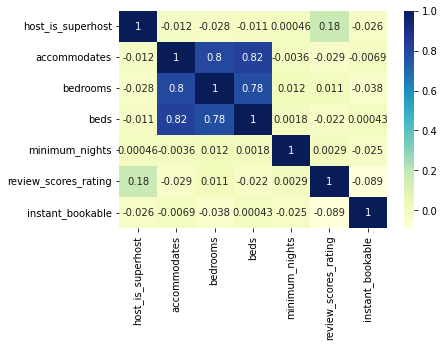

In [37]:
dataplot = sns.heatmap(num_var.corr(), cmap="YlGnBu", annot=True)
plt.show()

Using 80% or higher as a base to represent either positive or negative relationship between features. The correlation map reveals strong relationship between "accommodates", "bedrooms", "beds". We may confidently leave out 
one of these three in our model training, it will likely not impact the outcome of the model. However, it is imperative to conduct another test for confirmation for consistency using p value ≤ 0.05 as implemented in categorical variables in a pairwise ttest.

In [389]:
## Creating a pairwise combination with all numeric features
import itertools
s = itertools.combinations(num_var, 2)
s = list(s)
print(s)

[('host_is_superhost', 'accommodates'), ('host_is_superhost', 'bedrooms'), ('host_is_superhost', 'beds'), ('host_is_superhost', 'minimum_nights'), ('host_is_superhost', 'review_scores_rating'), ('host_is_superhost', 'instant_bookable'), ('accommodates', 'bedrooms'), ('accommodates', 'beds'), ('accommodates', 'minimum_nights'), ('accommodates', 'review_scores_rating'), ('accommodates', 'instant_bookable'), ('bedrooms', 'beds'), ('bedrooms', 'minimum_nights'), ('bedrooms', 'review_scores_rating'), ('bedrooms', 'instant_bookable'), ('beds', 'minimum_nights'), ('beds', 'review_scores_rating'), ('beds', 'instant_bookable'), ('minimum_nights', 'review_scores_rating'), ('minimum_nights', 'instant_bookable'), ('review_scores_rating', 'instant_bookable')]


In [390]:
result_2 = []
for i in s:
    if i[0] != i[1]:
        result_2.append(ss.ttest_ind(
                            num_var[i[0]], num_var[i[1]]))

In [391]:
result_2

[Ttest_indResult(statistic=-410.8684754269674, pvalue=0.0),
 Ttest_indResult(statistic=-401.43271096603746, pvalue=0.0),
 Ttest_indResult(statistic=-348.6361125687424, pvalue=0.0),
 Ttest_indResult(statistic=-63.65754662912248, pvalue=0.0),
 Ttest_indResult(statistic=-2932.899975835616, pvalue=0.0),
 Ttest_indResult(statistic=-102.27173006440538, pvalue=0.0),
 Ttest_indResult(statistic=210.82016191212728, pvalue=0.0),
 Ttest_indResult(statistic=160.3332593319746, pvalue=0.0),
 Ttest_indResult(statistic=-26.39903415689923, pvalue=3.119119508162719e-153),
 Ttest_indResult(statistic=-2775.9321305270537, pvalue=0.0),
 Ttest_indResult(statistic=374.6030675451365, pvalue=0.0),
 Ttest_indResult(statistic=-52.73448478653465, pvalue=0.0),
 Ttest_indResult(statistic=-46.90458806031357, pvalue=0.0),
 Ttest_indResult(statistic=-2880.623697311922, pvalue=0.0),
 Ttest_indResult(statistic=313.87263624589934, pvalue=0.0),
 Ttest_indResult(statistic=-43.29174197965434, pvalue=0.0),
 Ttest_indResult(sta

The result_2 above shows that the pariwise combination of all features in a pairwise ttest are statistically significant 
with p-value <= 0.05. 


## Post Hoc Test
This test is to double check the result of the assertion the ttest made that there is strong relationship between features.

## Bonferroni Test

This test is used to reduce the alpha further by dividing the default alpha (0.05) by the number of pairings 
to test the relationship between the features.

In [392]:
Bonferrini_corrected_alpha = 0.05/21
print('The new alpha is: ', Bonferrini_corrected_alpha)

The new alpha is:  0.002380952380952381


In [393]:
p_value = []
for i in (result_2):
    if i[1] <= Bonferrini_corrected_alpha:
            print("Test rejects H0 and accepts H1", i)
            
    else:
        print("Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.0024")

Test rejects H0 and accepts H1 Ttest_indResult(statistic=-410.8684754269674, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=-401.43271096603746, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=-348.6361125687424, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=-63.65754662912248, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=-2932.899975835616, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=-102.27173006440538, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=210.82016191212728, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=160.3332593319746, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=-26.39903415689923, pvalue=3.119119508162719e-153)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=-2775.9321305270537, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=374.6030675451365, pvalue=0.0)
T

## Text Cleaning

In [70]:
new_data['amenities'] = [str (item) for item in new_data['amenities']]

In [73]:
new_data.dropna(inplace = True)

In [403]:
#new_data['amenitiesss'] = ' '.join(x for x in new_data['amenities'] if x.isalpha())

In [69]:
#new_data.drop([10803], axis=0, inplace=True)

In [68]:
new_data.iloc[[10801]]

,host_location,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,minimum_nights,review_scores_rating,instant_bookable,price
10802,"England, United Kingdom",Entire apartment,Entire home apt,"Host greets you, Refrigerator, Microwave, Wifi...",0,2,1,1,5,95.0,0,70.0


In [71]:
enableStopwords = True
if enableStopwords:
    new_data['amenities'] = new_data['amenities'].str.replace('!@\#$%|~^".&*/', "", regex=False)
    new_data.head(2)

In [74]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 76153):
    amenities = re.sub('[^a-zA-Z]', ' ', new_data['amenities'][i])
    amenities = amenities.lower()
    amenities = amenities.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    amenities = [ps.stem(word) for word in amenities if not word in set(all_stopwords)]
    amenities = ' '.join(amenities)
    corpus.append(amenities)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyError: 10801

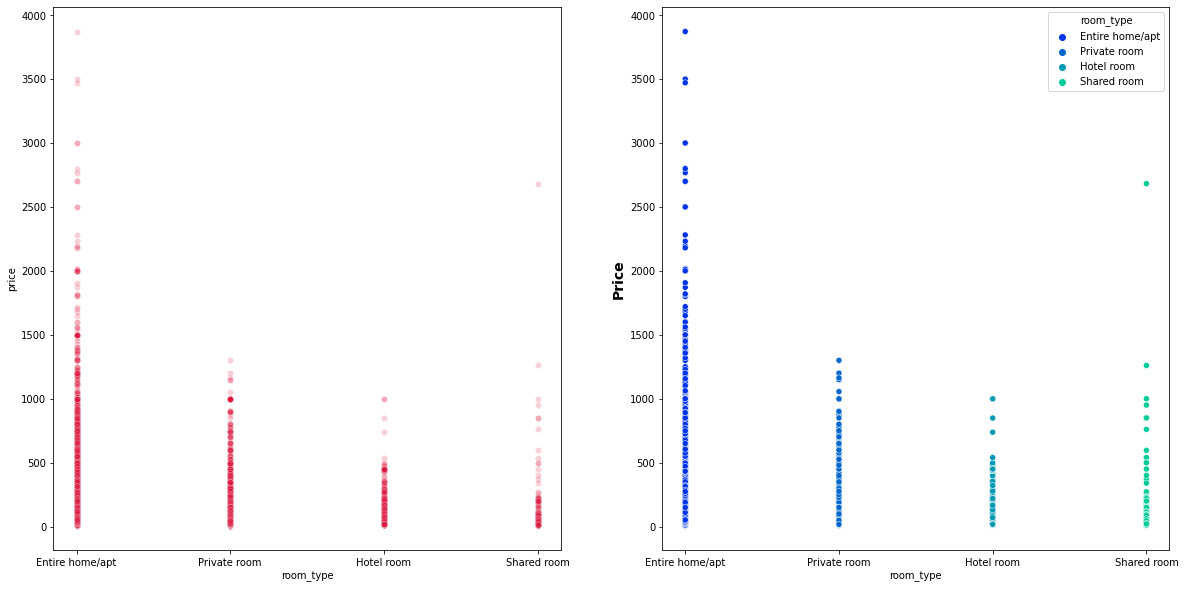

In [92]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=new_data, x="room_type", y="price", color="crimson", alpha=0.2
)

plt.subplot(1, 2, 2)
sns.scatterplot(
    data=new_data,
    x="room_type",
    y="price",
    hue="room_type",
    palette="winter",
)
plt.ylabel("Price", fontsize=14, fontweight= "bold")
ax.tick_params(axis="x", rotation=90)
plt.show()

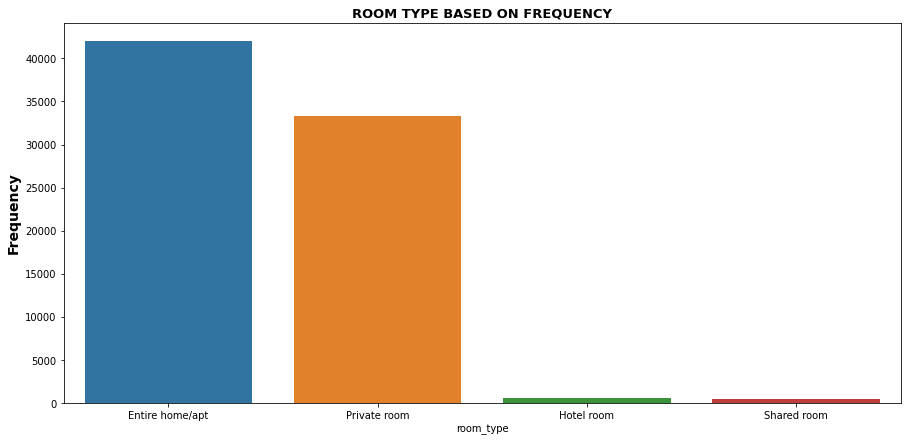

In [85]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(
    "room_type",
    data=new_data,
    order=new_data["room_type"].value_counts().index,
    palette="tab10",
)
ax.set_xticklabels(
    [
        "Entire home/apt",
        "Private room",
        "Hotel room",
        "Shared room",
    ]
)
plt.title(
    "ROOM TYPE BASED ON FREQUENCY",
    fontsize=13,
    fontweight="bold",
)
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.show()

In [96]:
# creating a dataframe of host_location and price to develop some visuals and show relationship
location_price = new_data[["host_location", "price"]]

In [117]:
location_price.value_counts()

host_location                        price
London, England, United Kingdom      50.0     1039
                                     40.0     1032
                                     100.0     983
                                     35.0      903
                                     30.0      889
                                              ... 
Heronsgate, England, United Kingdom  40.0        1
Herne Bay, England, United Kingdom   55.0        1
Herefordshire                        295.0       1
Hereford, England, United Kingdom    236.0       1
英國倫敦                                 55.0        1
Length: 10822, dtype: int64

In [106]:
location_price.price.mean()

107.52470847617303

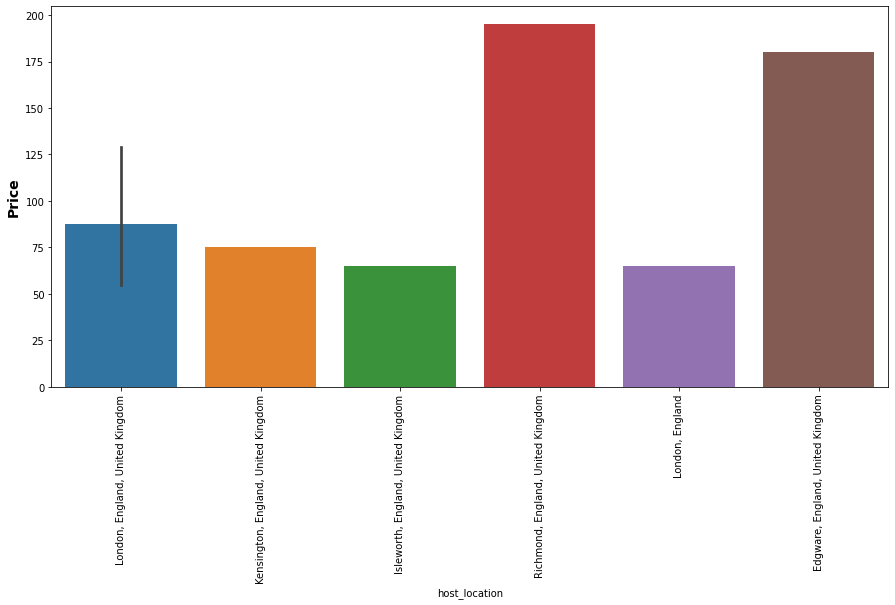

In [132]:
# Inspecting top 20 host locations with highest airbnb price according to data
plt.figure(figsize=(15, 7))
sns.barplot(data=location_price[:20], x="host_location", y="price")
plt.ylabel("Price", fontsize=14, fontweight= "bold")
plt.xticks(rotation=90)
plt.show()

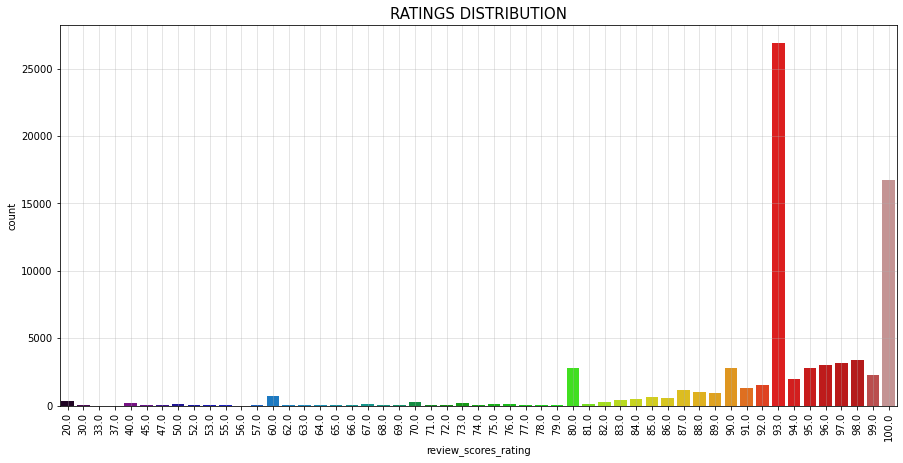

In [227]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(new_data["review_scores_rating"], palette="nipy_spectral")
plt.title("RATINGS DISTRIBUTION", fontsize=15)
plt.grid(alpha=0.4)
plt.xticks(rotation=90)
plt.show()

In [134]:
new_data.shape

(76426, 12)

<AxesSubplot:xlabel='price', ylabel='Density'>

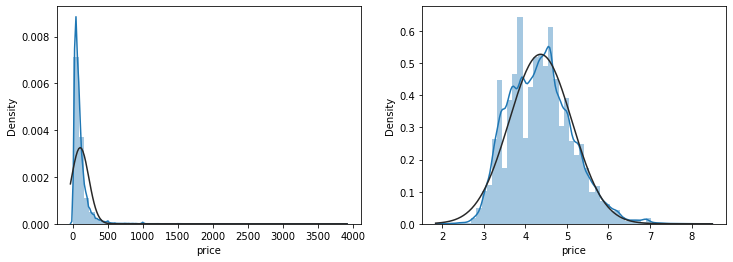

In [181]:
# inspecting price distribution and visualizing how normalizing the price will balance the data
from scipy.stats import norm

fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(new_data['price'], ax=ax[0], fit=norm)
sns.distplot(np.log(new_data[('price')]+1), ax=ax[1], fit= norm)

### Splitting Data into independent and dependent features X, y

In [135]:
X = new_data.iloc[0:76426, 0:11]
y = new_data.iloc[:, -1]

In [138]:
X.tail(2)

,host_location,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,minimum_nights,review_scores_rating,instant_bookable
76604,GB,Entire apartment,Entire home/apt,"[""Long term stays allowed"", ""Heating"", ""Extra ...",0,4,2,2,3,93.0,0
76605,"England, United Kingdom",Private room in apartment,Private room,"[""Refrigerator"", ""Shampoo"", ""Toaster"", ""Microw...",0,2,1,1,2,93.0,0


In [222]:
new_data["host_location"].unique().shape

(2425,)

In [142]:
y.tail(2)

76604    433.0
76605     18.0
Name: price, dtype: float64

In [146]:
# scaling the numeric variable to remove outliers. 
from sklearn.preprocessing import StandardScaler
 as 
sc = StandardScaler()
new_num_var = sc.fit_transform(num_var)

In [ ]:
for i in new_data:
    if 

In [149]:
num_var.columns

Index(['host_is_superhost', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'review_scores_rating', 'instant_bookable'],
      dtype='object')

In [150]:
new_num_varr = pd.DataFrame(new_num_var, columns = ['host_is_superhost', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'review_scores_rating', 'instant_bookable'])

In [151]:
new_num_varr

,host_is_superhost,accommodates,bedrooms,beds,minimum_nights,review_scores_rating,instant_bookable
0,-0.407485,0.486277,-0.548418,1.041001,-0.145146,-0.232073,1.324383
1,-0.407485,-0.549775,-0.548418,-0.608124,-0.191275,0.454458,-0.755068
2,-0.407485,-0.549775,-0.548418,-0.608124,0.223885,0.340036,1.324383
3,2.454081,1.522329,1.853220,1.041001,-0.052888,0.111192,-0.755068
4,-0.407485,-0.549775,-0.548418,-0.608124,-0.099017,-0.003229,-0.755068
...,...,...,...,...,...,...,...
76421,-0.407485,0.486277,0.652401,0.216439,-0.099017,-0.003229,1.324383
76422,-0.407485,-0.549775,-0.548418,-0.608124,-0.099017,0.797724,1.324383
76423,-0.407485,0.486277,0.652401,1.865563,-0.052888,-0.003229,-0.755068
76424,-0.407485,0.486277,0.652401,0.216439,-0.099017,-0.003229,-0.755068


In [164]:
new_num_varr.columns

Index(['host_is_superhost', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'review_scores_rating', 'instant_bookable'],
      dtype='object')

In [ ]:
, 'accommodates', 'bedrooms', 'beds','minimum_nights', 'review_scores_rating', 'instant_bookable'

In [170]:
df_cat['host_is_superhost'] = new_num_varr['host_is_superhost']

In [171]:
df_cat['accommodates'] = new_num_varr['accommodates']
df_cat['bedrooms'] = new_num_varr['bedrooms']
df_cat['beds'] = new_num_varr['beds']
df_cat['minimum_nights'] = new_num_varr['minimum_nights']
df_cat['review_scores_rating'] = new_num_varr['review_scores_rating']
df_cat['instant_bookable'] = new_num_varr['instant_bookable']

## Splitting data into Training Set and Test Set

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}

In [217]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor()

In [223]:
#gbm.fit(X_train, y_train)

In [225]:
import autogluon.tabular import TabularPredictor

SyntaxError: invalid syntax (<ipython-input-225-367650abd756>, line 1)

In [ ]:
pip